# MACHINE LEARNING PROJECT

## "Class prediction for Newland Citizens"

Lorenzo Pigozzi   |
Nova Ims   |
Master in Data Science and Advanced Analytics

## Index

1. Importing the libraries and the train-set
2. Features Engineering
3. Encoding
4. Missing values
5. Split: train set and test set
6. Outliers
7. Index of the dataset
8. Feature selection
9. Modeling: Hist-Gradient Boosting
10. Hyper-Parameters tuning
11. Model assessment
12. Prediction for Kaggle

## 1. Importing the libraries and the train set data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import KFold
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Setting the theme for the plots
sns.set_theme()

In [22]:
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(data):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
    train_results = []
    test_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt =  HistGradientBoostingClassifier(loss = 'auto', max_leaf_nodes = 20, min_samples_leaf = 7, max_bins = 200, max_iter=value)
        elif parameter == 'Learning Rate':
            dt = HistGradientBoostingClassifier(loss = 'auto', max_leaf_nodes = 20, min_samples_leaf = 7, max_bins = 200, learning_rate= value)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train)))
        test_results.append(f1_score(y_test,dt.predict(x_test)))
    value_train = train_results.index(max(train_results))
    value_test = test_results.index(max(test_results))
    print('The best train value is ',interval[value_train])
    print('The best test value is ',interval[value_test])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()
    
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                              Model 1                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Model 2                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))
    

In [23]:
def run_model(model,X,y):
    model = model.fit(X,y)
    return model



def evaluate_model(X,y, model):
    return model.score(X,y)


def avg_score(model, method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model(model, X_train, y_train)
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test,y_test, model)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

Importing data

In [24]:
# Importing the file into a pandas dataframe
newland = pd.read_excel('Train.xlsx')

# defining metric and non-metric features
metric_features = ['Years of Education','Working Hours per week','Money Received','Ticket Price','Income']
non_metric_features = ['Name','Birthday','Native Continent','Marital Status','Lives with','Base Area','Education Level','Employment Sector','Role']

## 2. Features engineering

In [25]:
#gender
newland['Gender'] = newland['Name'].str.split(n=2,expand=True).rename(columns={0:'Gender'}).drop(columns=[1,2])

newland['Gender'].value_counts()

newland['Gender'] = newland['Gender'].replace('Mr.', 0)
newland['Gender'] = newland['Gender'].replace('Mrs.', 1)
newland['Gender'] = newland['Gender'].replace('Miss', 1)

# Age
newland['year_of_birth'] = newland['Birthday'].map(lambda x: int(x[-4:]))
newland['Age'] = newland['year_of_birth'].map(lambda x: 2048 - x)
del newland['year_of_birth']

# deleting the variables Name and Birthday, they are not directly relevant to predict the target
del newland['Name']
del newland['Birthday']

## 3. Encoding

Encoding some variables manually

In [26]:
# Creating a copy of the dataset
newland_labels = newland.copy()

# Encoding the variable Education Level manually (it will be numerical because it's categorical but ordinal)
newland_labels['Education Level'] = newland_labels['Education Level'].replace(['Preschool',
'Primary School',
'Middle School - 1st Cycle',
'Middle School - 2nd Cycle',
'Middle School Complete',
'High School - 1st Cycle',
'High School - 2nd Cycle',
'Professional School',
'High School Complete',
'Professional School + PostGraduation',
'High School + PostGraduation',
'Bachelors',
'Bachelors + PostGraduation',
'Masters',
'Masters + PostGraduation',
'PhD'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

# Encoding manually
# Replacing the values in some labels manually
newland_labels['Native Continent'] = newland_labels['Native Continent'].replace(['Asia', 'America', 'Oceania'], 'Other')
newland_labels['Marital Status'] = newland_labels['Marital Status'].replace(['Married - Spouse Missing', 'Separated', 'Widow', 'Married - Spouse in the Army'], 'Other')
newland_labels['Lives with'] = newland_labels['Lives with'].replace(['Wife', 'Husband'], 'Wife / Husband')
newland_labels['Base Area'] = newland_labels['Base Area'].replace(['Auchenshuggle', 'Sharnwick', 'Laewaes',
       'MillerVille', 'Fanfoss', 'Wigston', 'Aerilon', 'Watford',
       "Knife's Edge", 'Lanercost', 'Bellmoral', 'Bellenau', 'Butterpond',
       'Laenteglos', 'Tranmere', 'Eelry', 'Alverton', 'Pran', 'Willesden',
       "King's Watch", 'Kald', 'Kirkwall', "Fool's March",
       'Middlesbrough', 'Orilon', 'Aroonshire', 'Aberuthven', 'Lewes',
       'Marnmouth', 'Mensfield', 'Sharpton', 'Cherrytown', 'Redwick Bush',
       'Drumchapel', 'Carlisle', 'Conriston', 'Woodpine', 'Ironforge'], 'Other')
newland_labels['Employment Sector'] = newland_labels['Employment Sector'].replace(['Private Sector - Others',
       'Self-Employed (Company)', 'Public Sector - Government',
       'Unemployed', 'Never Worked'], 'Other')

newland = newland_labels.copy()

OneHotEncoder

In [27]:
# One Hot Encoder 

newland_ohc = newland.copy()


# Updating metric and non-metric features
# Education level now is a metric feature
metric_features = ['Years of Education','Working Hours per week','Money Received','Ticket Price', 'Age', 'Sex', 'Income']
non_metric_features = ['Native Continent','Marital Status','Lives with','Base Area','Employment Sector','Role']

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(newland_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names(non_metric_features)
ohc_df = pd.DataFrame(ohc_feat, index=newland_ohc.index, columns=ohc_feat_names)

newland_ohc1 = pd.concat([newland_ohc.drop(columns=non_metric_features), ohc_df], axis=1)

newland = newland_ohc1.copy()

## 4. Missing values (engineering)

In [28]:
# Missing values
# 
# Defining the variables to change to nan (based on the ?)
Base_Area_to_replace = ['Base Area_Northbury','Base Area_Other']
Employment_Sector_to_replace = ['Employment Sector_Other','Employment Sector_Private Sector - Services ','Employment Sector_Public Sector - Others','Employment Sector_Self-Employed (Individual)']
Role_to_replace = ['Role_Administratives', 'Role_Agriculture and Fishing', 'Role_Army','Role_Cleaners & Handlers', 'Role_Household Services', 'Role_IT','Role_Machine Operators & Inspectors', 'Role_Management','Role_Other services', 'Role_Professor', 'Role_Repair & constructions','Role_Sales', 'Role_Security', 'Role_Transports']

# Defining the nan values
newland.loc[newland['Base Area_?'] == 1.0, Base_Area_to_replace] = np.nan
newland.loc[newland['Employment Sector_?'] == 1.0, Employment_Sector_to_replace] = np.nan
newland.loc[newland['Role_?'] == 1.0, Role_to_replace] = np.nan

# Dropping the variables with the question mark
newland.drop(columns=['Base Area_?','Employment Sector_?','Role_?'], inplace = True)

# For the problem of the linearity, dropping 1 variable for each previous variable
newland.drop(['Native Continent_Africa', 'Marital Status_Divorced', 'Lives with_Alone','Base Area_Other', 'Employment Sector_Other', 'Role_Army'], axis = 1, inplace = True)

## 5. Split: train set and test set

In [9]:
X = newland.drop(['Income'], axis=1)
Y = newland['Income']

X_train, X_test,y_train, y_test = train_test_split(X,Y,train_size = 0.80, shuffle = True, stratify = Y)

newland = pd.concat([X_train, y_train], axis = 1)

## 6. Outliers

In [29]:
# Outliers 

newland_outliers = newland.copy()

variables_for_outliers = ['Years of Education',
       'Working Hours per week']

newland = newland.reset_index(drop=True)


lower_lim = newland[variables_for_outliers].quantile(.01)
upper_lim = newland[variables_for_outliers].quantile(.99)

filters = []
for metric in variables_for_outliers:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(newland[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
newland_outliers = newland[filters]
print('Percentage of data kept after removing outliers:', np.round(newland_outliers.shape[0] / newland.shape[0], 4))

newland = newland_outliers.copy()

Percentage of data kept after removing outliers: 0.9776


## 7. Index of the dataset

In [30]:
# Setting the index in the dataset
newland = newland.set_index('CITIZEN_ID')

## 8. Feature selection

In [31]:
# Feature selection matching the result for MIC, feature importance by gradient boosting, correlation matrix

feature_selection = ['Lives with_Wife / Husband',
 'Money Received',
 'Years of Education',
 'Ticket Price',
 'Age',
 'Working Hours per week',
 'Role_Management',
 'Role_Professor',
 'Role_Agriculture and Fishing',
 'Gender',
 'Employment Sector_Self-Employed (Individual)',
 'Role_Other services', 'Income']
 
newland_fs = newland[feature_selection]

## 9. Modeling: Hist-Gradient Boosting

Train validation split

In [13]:
# TRAIN VALIDATION SPLIT

X = newland_fs.drop(['Income'], axis=1)
Y = newland_fs['Income']

X_train, X_validation,y_train, y_validation = train_test_split(X,Y,train_size = 0.80, shuffle = True, stratify = Y)


# Standardization of the variables with the robust scaler
robust = RobustScaler().fit(X_train)
X_train_robust = pd.DataFrame(robust.transform(X_train), columns=X_train.columns, index = X_train.index)
X_validation_robust = pd.DataFrame(robust.transform(X_validation), columns=X_validation.columns, index = X_validation.index)

X_train = X_train_robust
X_validation = X_validation_robust

Hist gradient Boosting

In [18]:
is_categorical = [0,6,7,8,9,10,11]

hgb_model =  HistGradientBoostingClassifier(loss = 'binary_crossentropy', max_leaf_nodes = 20, min_samples_leaf = 7, max_bins = 150, learning_rate= 0.3, max_iter=135, categorical_features=is_categorical, max_depth=3, random_state=0)

hgb_model.fit(X_train, y_train)
y_prediction = hgb_model.predict(X_validation)  
GradientBoosting_F1 = round(f1_score(y_true = y_validation, y_pred = y_prediction, average='micro')*100, 3)
GradientBoosting_F1

87.361

In [19]:
newland_check = pd.concat([X_validation.reset_index(), pd.Series(y_prediction), y_validation.reset_index()], axis = 1)

validation_set = newland_check.rename(columns={0: "prediction"})

In [20]:
pd.DataFrame(confusion_matrix(validation_set.prediction, validation_set.Income), 
                              columns=['Real 0', 'Real 1'], 
                              index =['Predicted 0', 'Predicted 1'])

,Real 0,Real 1
Predicted 0,2533,310
Predicted 1,133,529


<Figure size 720x576 with 0 Axes>

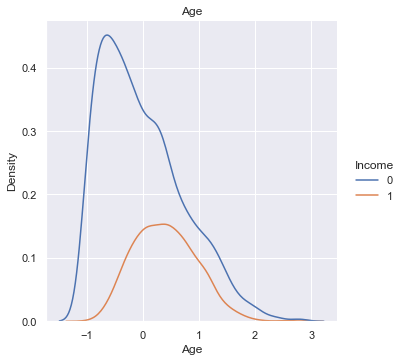

In [339]:
plt.figure(figsize=(10, 8))
sns.displot(prova, x='Age', kind="kde", hue='Income')
plt.title('Age')
plt.show()

<Figure size 720x576 with 0 Axes>

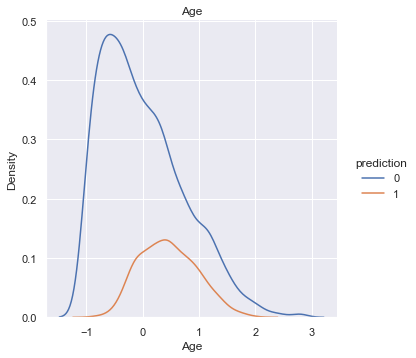

In [340]:
plt.figure(figsize=(10, 8))
sns.displot(prova, x='Age', kind="kde", hue='prediction')
plt.title('Age')
plt.show()

Cross validation

In [32]:
# CROSS VALIDATION

X = newland_fs.drop(['Income'], axis=1)
Y = newland_fs['Income']

# Standardization of the variables with the robust scaler
# robust = RobustScaler().fit(X)
# X_robust = pd.DataFrame(robust.transform(X), columns=X.columns, index = X.index)
# X = X_robust

In [34]:
new_metric = ['Years of Education', 'Working Hours per week',
       'Money Received', 'Ticket Price', 'Age']

In [40]:
# Standardization of the variables with the robust scaler
robust = RobustScaler().fit(X[new_metric])
robust_train = robust.transform(X[new_metric])
# robust_val = robust.transform(X_validation[new_metric])
X_train_robust = X.copy()
X_train_robust[new_metric] = robust_train
# X_validation_robust = X_validation.copy()
# X_validation_robust[new_metric] = robust_val

X_train = X_train_robust
# X_validation = X_validation_robust

Hist-Gradient Boosting 

In [42]:
X = X_train.copy()

In [44]:
# Integer array like for categorical features (encoded)
is_categorical=[0,6,7,8,9,10,11] 

# Hist gradient boosting, testing some parameters

hgb_model =  HistGradientBoostingClassifier(loss = 'binary_crossentropy', max_leaf_nodes = 20, min_samples_leaf = 7, max_bins = 150, learning_rate= 0.3, max_iter=135, categorical_features=is_categorical, max_depth=3, random_state=0)

kf = StratifiedKFold(n_splits=10)
avg_score(hgb_model,kf, X, Y)

Train: 0.8725150106981279
Test: 0.8676141813258905


In [266]:
# # Grid search 

# hgb_model =  HistGradientBoostingClassifier(loss = 'binary_crossentropy', max_leaf_nodes = 20, min_samples_leaf = 7, max_bins = 150, learning_rate= 0.3, max_iter=135, categorical_features=is_categorical)

# parameters_HGB = {'max_depth' : [None, 3, 5],
# 'random_state' : [None, 0, 42]}

# clf_hgb = GridSearchCV(hgb_model, parameters_HGB, scoring = 'f1_micro', cv=10, refit = True)
# clf_hgb.fit(X, Y)
# clf_hgb.best_params_

## 10. Hyper-Parameters tuning

In [62]:
# num_estimators = list(range(1,100))
# calculate_f1(num_estimators, X_train, X_validation, y_train, y_validation,'Number of estimators')

In [63]:
# learning_rate = list(np.linspace(0.1, 0.9, 9, endpoint=True))
# calculate_f1(learning_rate, X_train, X_validation, y_train, y_validation,'Learning Rate')

In [231]:
# max_bins = list(range(2,255))
# calculate_f1(max_bins, X_train, X_validation, y_train, y_validation,'Max Bins')

## 11. Model assessment

In [309]:
X_test_HGB = X_test.copy()


feature_selection = ['Lives with_Wife / Husband',
 'Money Received',
 'Years of Education',
 'Ticket Price',
 'Age',
 'Working Hours per week',
 'Role_Management',
 'Role_Professor',
 'Role_Agriculture and Fishing',
 'Gender',
 'Employment Sector_Self-Employed (Individual)',
 'Role_Other services']
 
 
 # Features selected
X_test_HGB = X_test_HGB[feature_selection]


# Standardization of the variables with the robust scaler
robust = RobustScaler().fit(X_test_HGB)
X_test_robust = pd.DataFrame(robust.transform(X_test_HGB), columns=X_test_HGB.columns, index = X_test_HGB.index)
X_test_HGB = X_test_robust

In [310]:
# Number 3
y_prediction = hgb_model.predict(X_test_HGB)  
HistGradient_F1 = round(f1_score(y_true = y_test, y_pred = y_prediction, average='micro')*100, 3)
HistGradient_F1

87.679

## 12. Prediction for Kaggle

In [45]:
test = pd.read_excel('Test.xlsx')

# for the test set
newland = test.copy()

In [46]:
newland['Gender'] = newland['Name'].str.split(n=2,expand=True).rename(columns={0:'Gender'}).drop(columns=[1,2])
newland['Gender'] = newland['Gender'].replace('Mr.', 0)
newland['Gender'] = newland['Gender'].replace('Mrs.', 1)
newland['Gender'] = newland['Gender'].replace('Miss', 1)

newland['year_of_birth'] = newland['Birthday'].map(lambda x: int(x[-4:]))
newland['Age'] = newland['year_of_birth'].map(lambda x: 2048 - x)
del newland['year_of_birth']

del newland['Name']
del newland['Birthday']

In [47]:
# Creating a copy of the dataset
newland_labels = newland.copy()


# Encoding the variable Education Level manually (it will be numerical because it's categorical but ordinal)
newland_labels['Education Level'] = newland_labels['Education Level'].replace(['Preschool',
'Primary School',
'Middle School - 1st Cycle',
'Middle School - 2nd Cycle',
'Middle School Complete',
'High School - 1st Cycle',
'High School - 2nd Cycle',
'Professional School',
'High School Complete',
'Professional School + PostGraduation',
'High School + PostGraduation',
'Bachelors',
'Bachelors + PostGraduation',
'Masters',
'Masters + PostGraduation',
'PhD'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

# Encoding manually
# Replacing the values in some labels manually

newland_labels['Native Continent'] = newland_labels['Native Continent'].replace(['Asia', 'America', 'Oceania'], 'Other')

newland_labels['Marital Status'] = newland_labels['Marital Status'].replace(['Married - Spouse Missing', 'Separated', 'Widow', 'Married - Spouse in the Army'], 'Other')

newland_labels['Lives with'] = newland_labels['Lives with'].replace(['Wife', 'Husband'], 'Wife / Husband')

newland_labels['Base Area'] = newland_labels['Base Area'].replace(['Auchenshuggle', 'Sharnwick', 'Laewaes',
       'MillerVille', 'Fanfoss', 'Wigston', 'Aerilon', 'Watford',
       "Knife's Edge", 'Lanercost', 'Bellmoral', 'Bellenau', 'Butterpond',
       'Laenteglos', 'Tranmere', 'Eelry', 'Alverton', 'Pran', 'Willesden',
       "King's Watch", 'Kald', 'Kirkwall', "Fool's March",
       'Middlesbrough', 'Orilon', 'Aroonshire', 'Aberuthven', 'Lewes',
       'Marnmouth', 'Mensfield', 'Sharpton', 'Cherrytown', 'Redwick Bush',
       'Drumchapel', 'Carlisle', 'Conriston', 'Woodpine', 'Ironforge'], 'Other')

newland_labels['Employment Sector'] = newland_labels['Employment Sector'].replace(['Private Sector - Others',
       'Self-Employed (Company)', 'Public Sector - Government',
       'Unemployed', 'Never Worked'], 'Other')


newland = newland_labels.copy()

In [48]:
# one hot encoder

newland_ohc = newland.copy()


# Updating metric and non-metric features
# Education level now is a metric feature
metric_features = ['Years of Education','Working Hours per week', 'Education Level','Money Received','Ticket Price', 'Age', 'Sex', 'Income']
non_metric_features = ['Native Continent','Marital Status','Lives with','Base Area','Employment Sector','Role']

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(newland_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names(non_metric_features)
ohc_df = pd.DataFrame(ohc_feat, index=newland_ohc.index, columns=ohc_feat_names)

newland_ohc1 = pd.concat([newland_ohc.drop(columns=non_metric_features), ohc_df], axis=1)

newland = newland_ohc1.copy()

In [49]:
# Missing values
# 
# Defining the variables to change to nan (based on the ?)
Base_Area_to_replace = ['Base Area_Northbury','Base Area_Other']
Employment_Sector_to_replace = ['Employment Sector_Other','Employment Sector_Private Sector - Services ','Employment Sector_Public Sector - Others','Employment Sector_Self-Employed (Individual)']
Role_to_replace = ['Role_Administratives', 'Role_Agriculture and Fishing', 'Role_Army','Role_Cleaners & Handlers', 'Role_Household Services', 'Role_IT','Role_Machine Operators & Inspectors', 'Role_Management','Role_Other services', 'Role_Professor', 'Role_Repair & constructions','Role_Sales', 'Role_Security', 'Role_Transports']

# Defining the nan values
newland.loc[newland['Base Area_?'] == 1.0, Base_Area_to_replace] = np.nan
newland.loc[newland['Employment Sector_?'] == 1.0, Employment_Sector_to_replace] = np.nan
newland.loc[newland['Role_?'] == 1.0, Role_to_replace] = np.nan

# Dropping the variables with the question mark
newland.drop(columns=['Base Area_?','Employment Sector_?','Role_?'], inplace = True)


In [50]:
X_test = newland.copy()
# Setting the index in the dataset
X_test = X_test.set_index('CITIZEN_ID')

In [51]:
# Feature selection
# 
feature_selection = ['Lives with_Wife / Husband',
 'Money Received',
 'Years of Education',
 'Ticket Price',
 'Age',
 'Working Hours per week',
 'Role_Management',
 'Role_Professor',
 'Role_Agriculture and Fishing',
 'Gender',
 'Employment Sector_Self-Employed (Individual)',
 'Role_Other services']


X_test = X_test[feature_selection]

# Standardization of the variables with the robust scaler
# robust = RobustScaler().fit(X_test)
# X_test_robust = pd.DataFrame(robust.transform(X_test), columns=X_test.columns, index = X_test.index)
# X_test = X_test_robust

In [53]:
# Standardization of the variables with the robust scaler
robust = RobustScaler().fit(X_test[new_metric])
robust_train = robust.transform(X_test[new_metric])

X_train_robust = X_test.copy()
X_train_robust[new_metric] = robust_train

X_test = X_train_robust


In [57]:
y_prediction = hgb_model.predict(X_test)  
y_prediction = y_prediction.astype(int)
X_test.index = X_test.index.astype(int)

In [58]:
submission = pd.DataFrame({'CITIZEN_ID': X_test.index, 'Income': y_prediction})

filename = 'prediction_002.csv'
submission.to_csv(filename, index=False)

In [59]:
submission

,CITIZEN_ID,Income
0,34886,1
1,34887,0
2,34888,1
3,34889,0
4,34890,1
...,...,...
10095,44981,1
10096,44982,1
10097,44983,0
10098,44984,0
